## Omdena Chapter: Algeria
### Green Algeria Project Building an Intelligent Control System for greenhouses


<b> <h4> Dataset: <a href="https://www.kaggle.com/datasets/piantic/autonomous-greenhouse-challengeagc-2nd-2019">  Autonomous Greenhouse Challenge(AGC) 2019~2020 - 2nd Edition </a> </h4> </b>
<br>

Content : 
<br>
<table style="width:70%">
    <tr>
        <th style="width:30%"> File Name </th>
        <th style="width:70%"> Description </th>
    </tr>
    <tr>
        <td> Weather + Greenhouse-Climate </td>
        <td> outdoor and indoor greenhouse climate, irrigation, status of actuators,<br> requested and realized climate setpoints </td>
    </tr>
    <tr>
        <td> Resource </td>
        <td> Resource Consumption </td>
    </tr>
    <tr>
        <td> <b> Production </b> </td>
        <td> <b> Harvest </b> </td>
    </tr>
    <tr>
        <td> Crop-Production </td>
        <td> Crop-related parameters </td>
    </tr>
    <tr>
        <td> TomQuality </td>
        <td> Tomato Quality </td>
    </tr>
    <tr>
        <td> LabAnalysis </td>
        <td> Analysis of irrigation and drain samples </td>
    </tr>
    <tr>
        <td> Grodan-Sens </td>
        <td> Root-zone/slab information </td>
    </tr>
</table>


In [12]:
# This file covers the harvest analysis Greenhouse
# The weather & internal climates are covered in separate file

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path = ("../Dataset")
os.listdir(path)

['AICU',
 'Automatoes',
 'Digilog',
 'Economics.pdf',
 'IUACAAS',
 'ReadMe.pdf',
 'Reference',
 'TheAutomators',
 'Weather']

In [4]:
files = ['AICU', 'Automatoes', 'Digilog', 'IUACAAS', 'Reference', 'TheAutomators']

## Production

In [5]:
df = {}
for file in files:
    df[file] = pd.read_csv("../Dataset/"+file+"/Production.csv")

In [6]:
for i in df:
    print(i,"\n",df[i].head(),"\n")
    

AICU 
    %time  ProdA  ProdB  avg_nr_harvested_trusses  Truss development time   \
0  43875   0.12    0.0                       0.2                     45.0   
1  43880   0.50    0.0                       1.1                     48.7   
2  43885   0.58    0.0                       1.0                     48.3   
3  43889   0.27    0.0                       0.8                     50.1   
4  43894   0.73    0.0                       0.8                     50.8   

   Nr_fruits_ClassA  Weight_fruits_ClassA  Nr_fruits_ClassB  \
0               NaN                 213.0                 0   
1               NaN                1250.0                 0   
2             131.0                1224.0                 0   
3             128.0                1187.0                 0   
4             143.0                1328.0                 0   

   Weight_fruits_ClassB  
0                     0  
1                     0  
2                     0  
3                     0  
4                    

In [7]:
for i in df:
    df[i]['%time'] = pd.to_datetime(df[i]['%time'], unit='d',origin='1899-12-30')


In [8]:
col = df['AICU'].columns
col = col[1:]

In [9]:
#as the given data is in time-series format therefor interpolating the data with nearest member to remove null values

for i in df:
    for j in col:
        df[i][j] = df[i][j].astype(str).astype(float)

for i in df:
    df[i] = df[i].fillna(df[i].mean())  
  

C:\Users\vivek\AppData\Local\Temp\ipykernel_7892\2623652833.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[i] = df[i].fillna(df[i].mean())


In [10]:
for i in df:
    print(i,"\n",df[i].head(),"\n")

AICU 
        %time  ProdA  ProdB  avg_nr_harvested_trusses  Truss development time   \
0 2020-02-14   0.12    0.0                       0.2                     45.0   
1 2020-02-19   0.50    0.0                       1.1                     48.7   
2 2020-02-24   0.58    0.0                       1.0                     48.3   
3 2020-02-28   0.27    0.0                       0.8                     50.1   
4 2020-03-04   0.73    0.0                       0.8                     50.8   

   Nr_fruits_ClassA  Weight_fruits_ClassA  Nr_fruits_ClassB  \
0        126.318182                 213.0               0.0   
1        126.318182                1250.0               0.0   
2        131.000000                1224.0               0.0   
3        128.000000                1187.0               0.0   
4        143.000000                1328.0               0.0   

   Weight_fruits_ClassB  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0

C:\Users\vivek\AppData\Local\Temp\ipykernel_7892\2652991613.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)


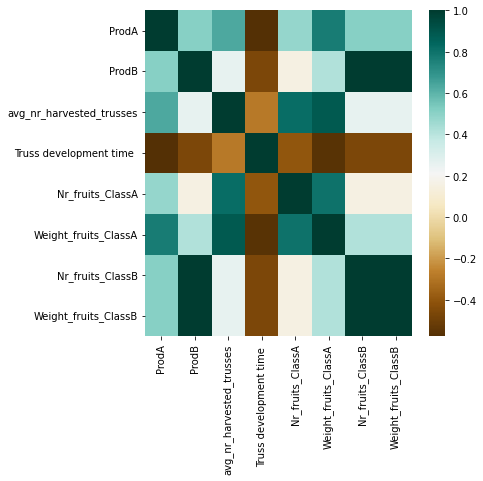

In [11]:
from pandas.plotting import scatter_matrix
df_corr = df['AICU'].corr()

f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

In [23]:
def plot(target):
    
    k=0
    sns.set()
    plt.figure(figsize=(20, 80),facecolor='lightgray')

    for j in col:
        plt.subplot(9, 1, k + 1)
        for i in df:
            plt.plot(df[i][target], df[i][j])
        plt.legend(files)
        plt.title("{var} vs {target}".format(var=j,target=target))
        plt.xlabel(j)
        plt.ylabel(target)
        k=k+1
    plt.show()
        
    

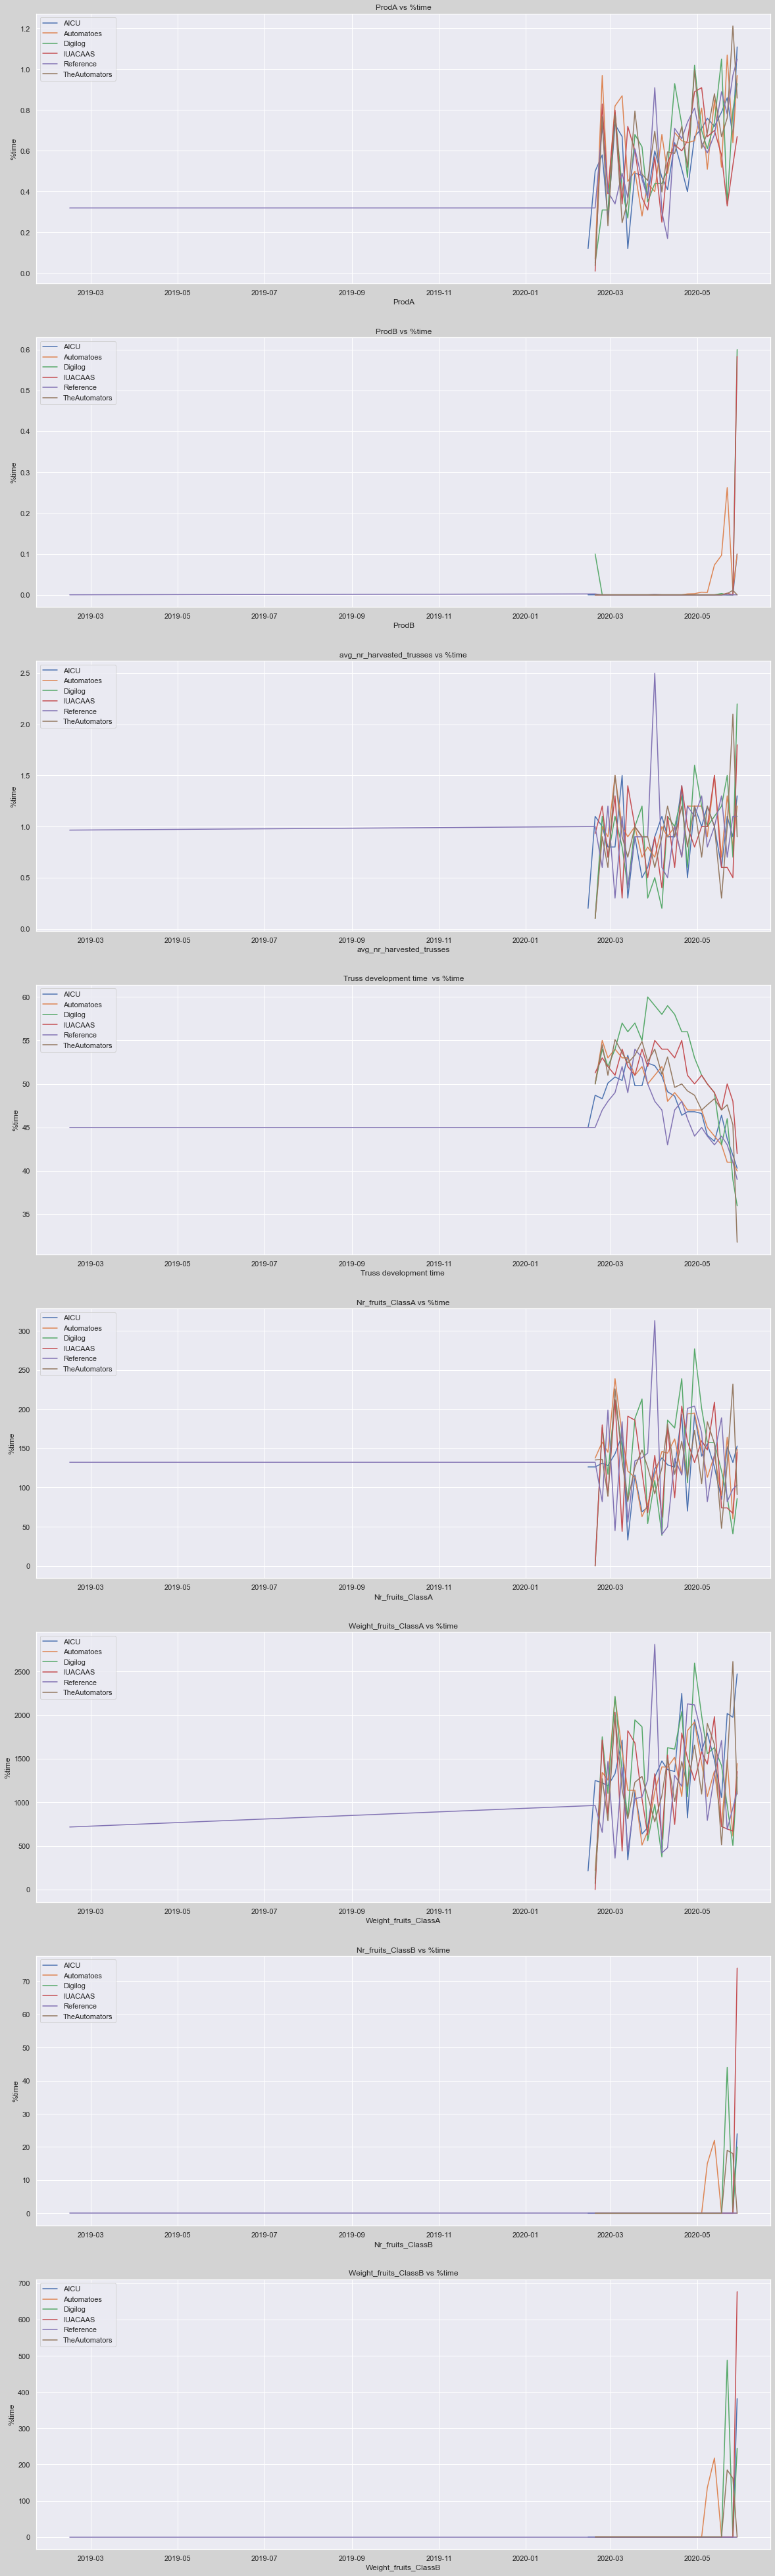

In [24]:
plot("%time")

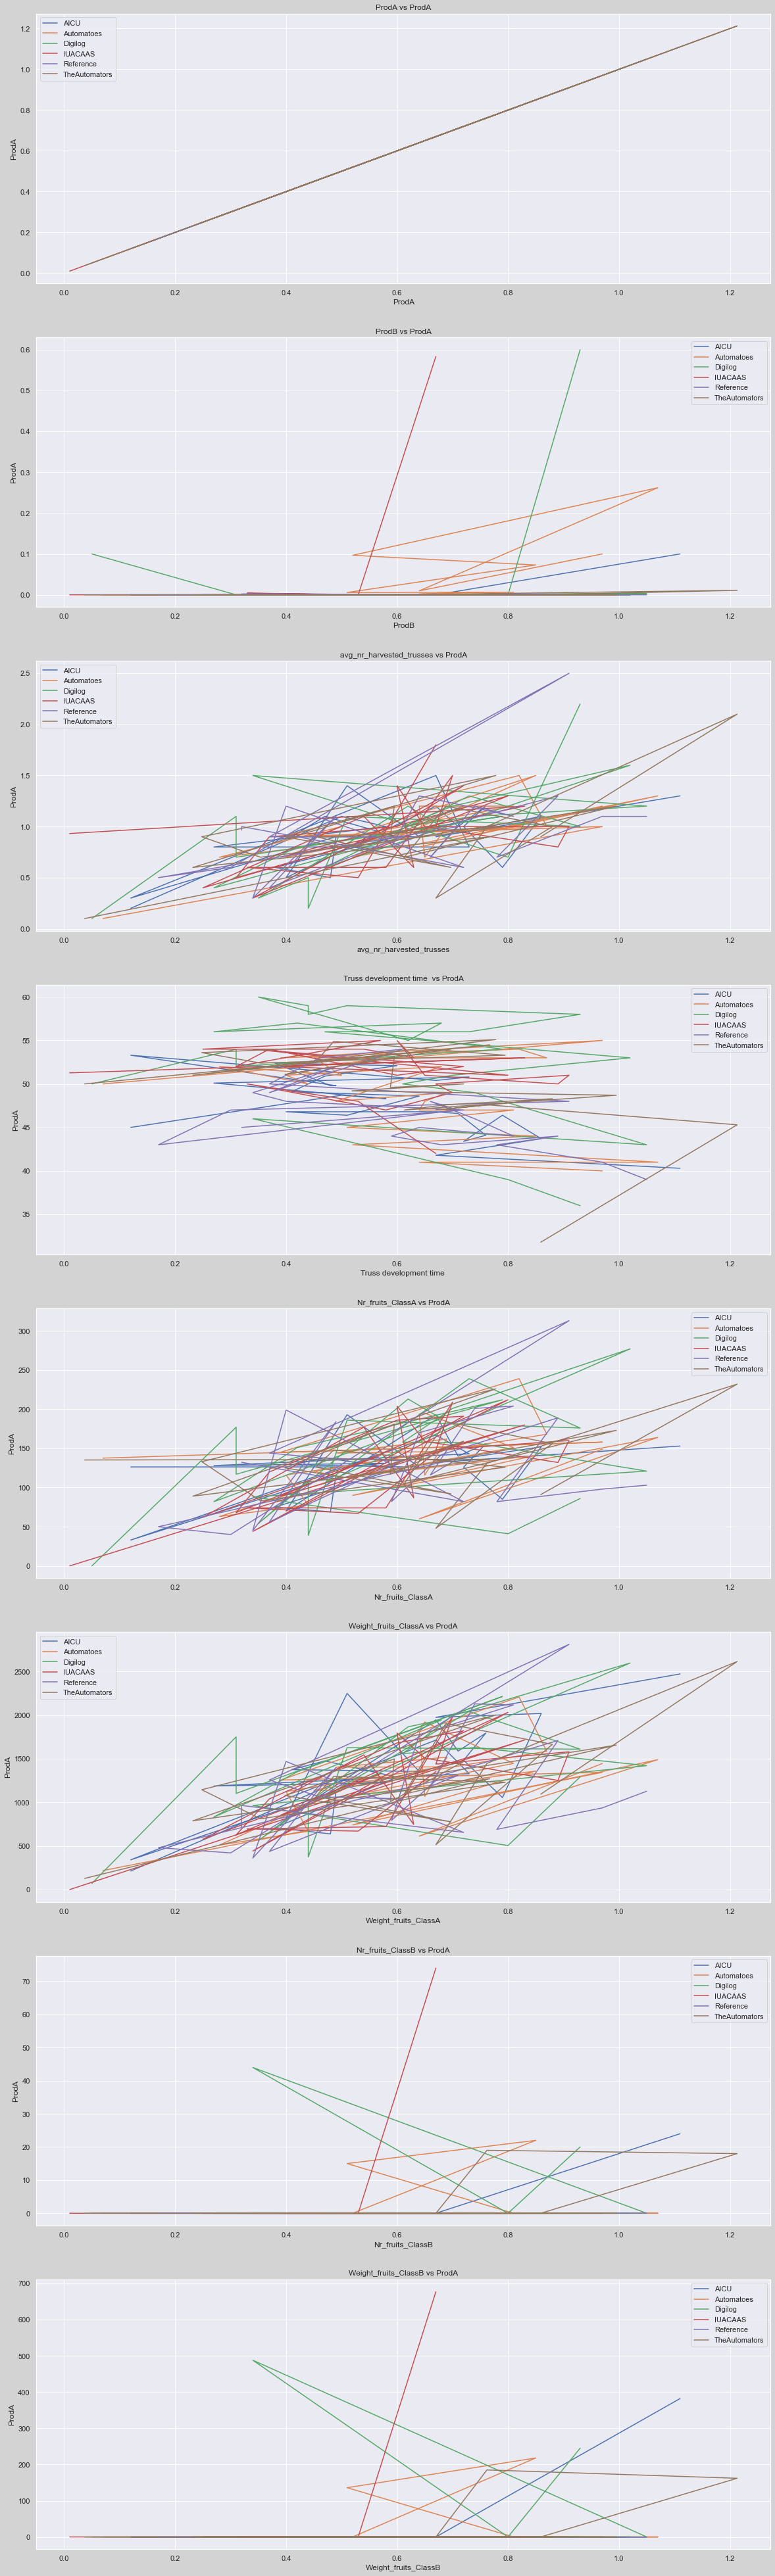

In [25]:
plot("ProdA")